# Omicron Feature Selection

In [39]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/Omicron_pre_processed3.xlsx'
dataset = pd.read_excel(file_path)
dataset.head()

,Subject_ID,AGE,GENDER,LOS,DAYS OF SYMPTOMS,FEVERx,COUGHx,FATIGUEx,DIARRHEASx,DYSPNEAx,...,Medication_zyvoxid.1,Medication_AMBISONE,Medication_enoxaparin,Medication_enoxaparin.1,Medication_PLAVIX,Medication_fondaparinux,Medication_SINTROM,Medication_DAKTARIN,Medication_tavanic,Medication_cubicin
0,1,71,2,6.0,3.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,103,2,6.0,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,45,1,6.0,4.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,79,1,5.0,5.0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,76,2,6.0,9.0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [41]:
# Remove 'Subject_ID' from the dataset
dataset = dataset.drop(columns=['Subject_ID'])
# Find and drop rows where 'Outcome_numerical' is 3
dataset = dataset[dataset['Outcome_numerical'] != 3]

In [42]:
dataset['Outcome_numerical'].values

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
# Check the remaining shape and missing values
cleaned_shape = dataset.shape
remaining_missing_values = dataset.isnull().sum().max()  # Max missing values in any column
cleaned_shape, remaining_missing_values


((197, 175), 0)

/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


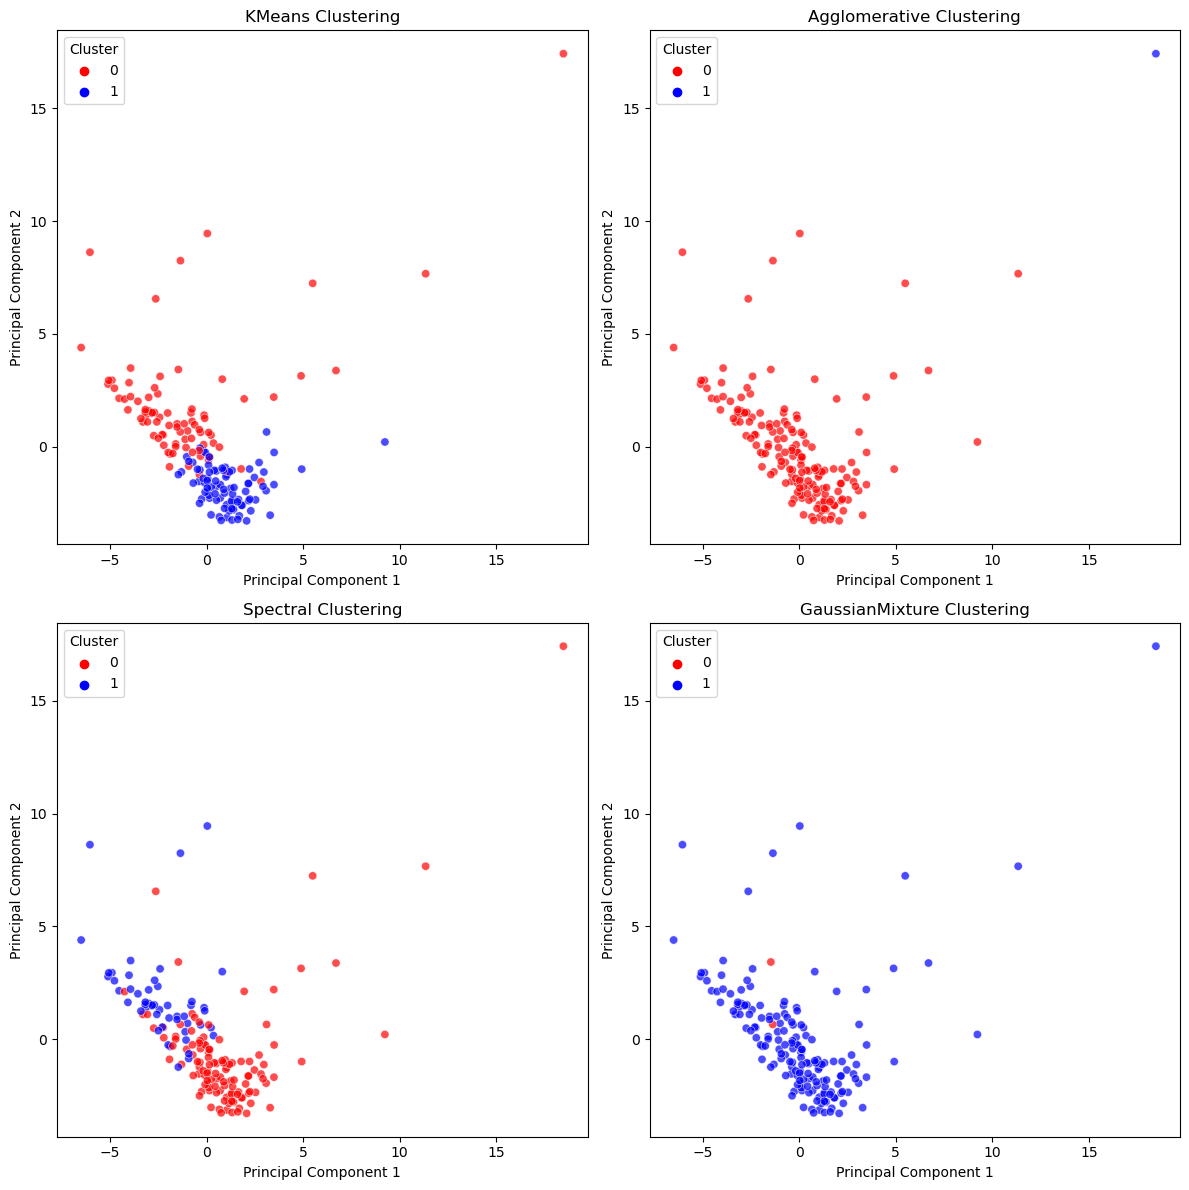

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#features_to_cluster = ['LOS', 'DAYS OF SYMPTOMS', 'INTUBATION', 'CPAP', 'GSC_cleaned',	'Systolic_BP',	'Diastolic_BP',	'PULSE RATE', 'TEMP',	'PH',	'PO2',	'PCO2',	'HCO3',	'FIO2 eisagwgh_cleaned', "WBC", "LDH", "CPK", "CRP", "FERRITIN", "PERNEUTROPHILS", "PERLYMPHOCYTES", "ABSLYMPHOCYTES", "Hb", "PLT", "INR", "APTT", "FIBRINOGEN", "K", "NA", "Glu", "UREA", "CR", "BIL", "DIRECT BIL", "SGOT", "SGPT", "TnI",	'FEVERx',	'COUGHx',	'FATIGUEx',	'DIARRHEASx',	'DYSPNEAx',	'URTIx',	'HIGH FLOW', 'WHO score', 'qSOFA', 'CCI', 'Outcome_numerical']
features_to_cluster = dataset.columns.tolist()
discharged_patients = dataset[dataset['Outcome_numerical'] == 1]
X = discharged_patients[features_to_cluster].fillna(1)  # Handling missing values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Adjust clustering algorithms to ensure two clusters, where applicable
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=2, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=2),
    'Spectral': SpectralClustering(n_clusters=2, random_state=42, affinity='nearest_neighbors'),
    'GaussianMixture': GaussianMixture(n_components=2, random_state=42)
}

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # Adjust for the number of algorithms
axes = axes.flatten()

for i, (name, alg) in enumerate(clustering_algorithms.items()):
    # Fit and predict clusters
    if name == 'GaussianMixture':  # Gaussian Mixture uses a different method
        labels = alg.fit_predict(X_scaled)
    else:
        labels = alg.fit_predict(X_scaled)
    

    
    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    pca_df['Cluster'] = labels
    
    # Plot
    sns.scatterplot(ax=axes[i], x='Principal Component 1', y='Principal Component 2', hue='Cluster', 
                    data=pca_df, palette=['red', 'blue'], alpha=0.7, legend='full')
    axes[i].set_title(f'{name} Clustering')
    axes[i].legend(title='Cluster')

plt.tight_layout()
plt.show()






/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[6.64024090e-14 1.15585291e-06 6.50190530e-05]
not reaching the requested tolerance 2.5480985641479492e-06.
Use iteration 1883 instead with accuracy 
1.5017305567090288e-05.

  _, diffusion_map = lobpcg(
/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[6.64036348e-14 1.15033862e-

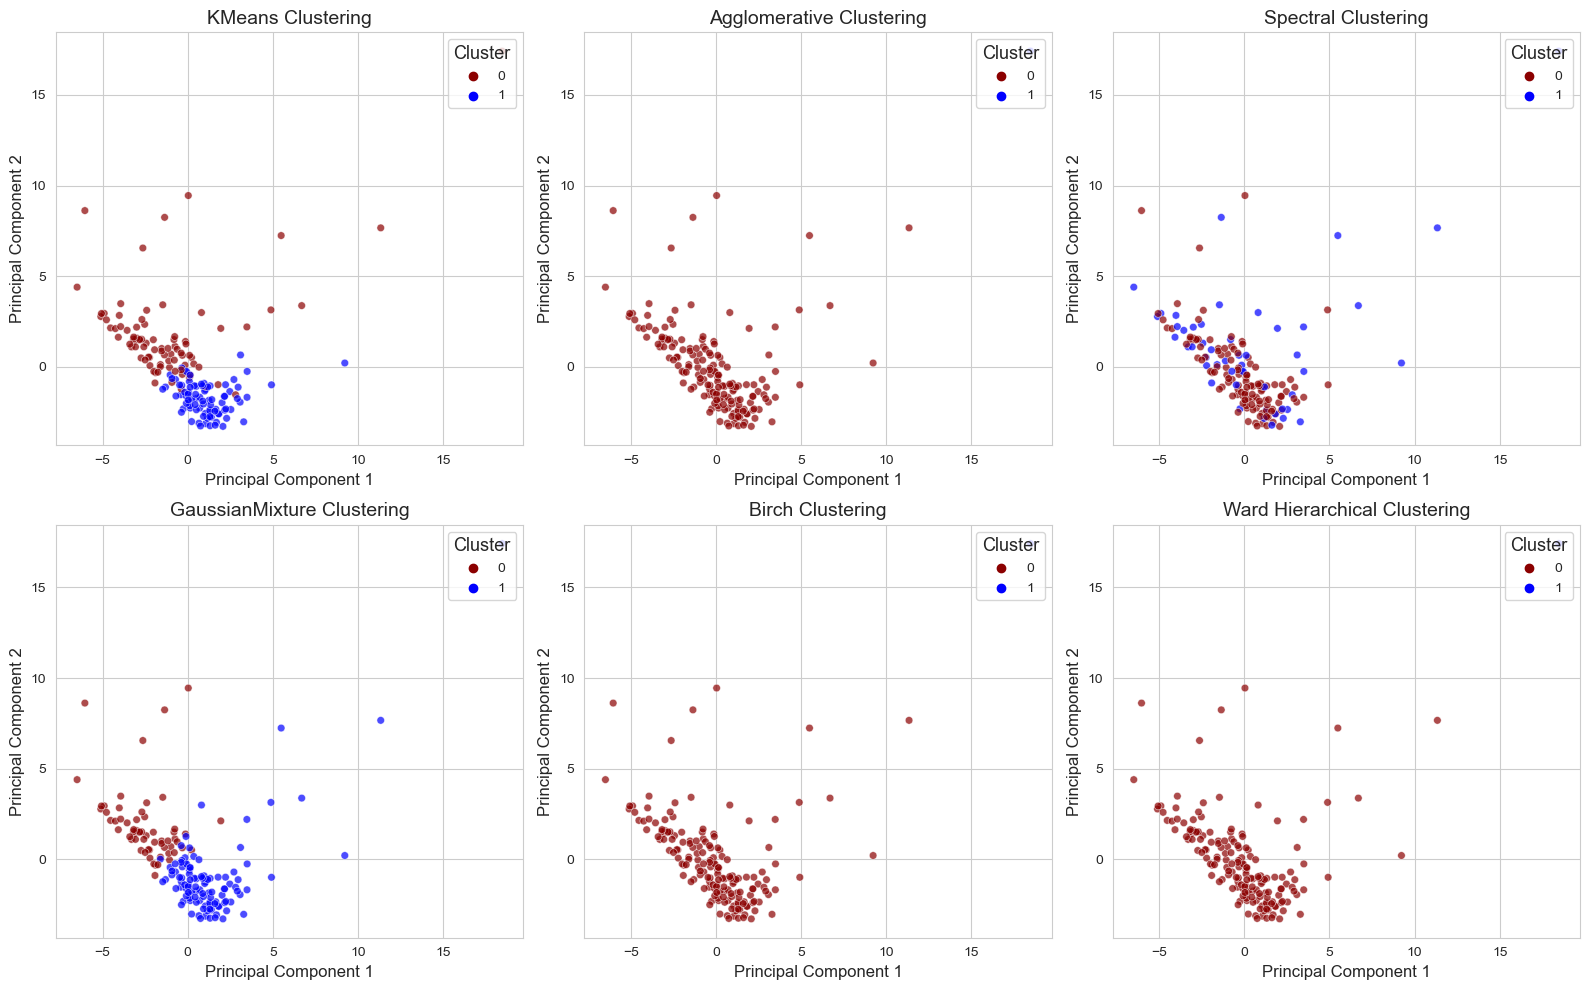

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.cluster import DBSCAN, MeanShift, OPTICS, Birch, AffinityPropagation, MiniBatchKMeans
from sklearn.cluster import FeatureAgglomeration
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Your selected features and data preparation
features_to_cluster = dataset.columns.tolist()
discharged_patients = dataset[dataset['Outcome_numerical'] == 1]
X = discharged_patients[features_to_cluster].fillna(1)  # Handling missing values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering algorithms setup
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=2, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=2),
    'Spectral': SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=42),
    'GaussianMixture': GaussianMixture(n_components=2, random_state=20),
    'Birch': Birch(n_clusters=2),
    'Ward Hierarchical': AgglomerativeClustering(n_clusters=2, linkage='ward'),
}

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Set up the plotting canvas
fig, axes = plt.subplots(2, 3, figsize=(16, 10)) 
axes = axes.flatten()

# Define your custom palette with improved colors
custom_palette = {'0': '#8B0000', '1': '#0000FF'}  # Dark red and blue

# Plot each clustering result
for i, (name, alg) in enumerate(clustering_algorithms.items()):
    # Fit and predict clusters
    labels = alg.fit_predict(X_scaled)
    str_labels = np.array([str(label) for label in labels])  # Convert labels to strings

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
    pca_df['Cluster'] = str_labels
    
    # Plotting with aesthetic improvements
    sns.scatterplot(ax=axes[i], x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                    data=pca_df, palette=custom_palette, alpha=0.7, legend='brief', s=30)
    axes[i].set_title(f'{name} Clustering', fontsize=14)
    axes[i].set_xlabel('Principal Component 1', fontsize=12)
    axes[i].set_ylabel('Principal Component 2', fontsize=12)
    axes[i].legend(title='Cluster', fontsize=10, title_fontsize='13', loc='upper right')
    axes[i].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


In [46]:
kmeans = clustering_algorithms['KMeans']
centroids = kmeans.cluster_centers_
feature_diff = np.abs(centroids[0] - centroids[1])
feature_importance_kmeans = pd.Series(feature_diff, index=features_to_cluster).sort_values(ascending=False)
print("Feature importance for KMeans clusters:")
print(feature_importance_kmeans.head(20))  

Feature importance for KMeans clusters:
MED/cardio                     1.368560
AGE                            1.334172
CM/HBP_Presence                1.325767
CCI                            1.286417
MED/statins                    0.994188
CM/lipid_Presence              0.964537
CM/DM_Presence                 0.924496
MED/DM                         0.884984
MED/other                      0.767763
UREA                           0.727216
MED/antiPLTs                   0.681461
Glu                            0.668869
CM/metabolic/other_Presence    0.640114
CM/CAD_Presence                0.623822
TEMP                           0.607394
FEVERx                         0.586576
WHO score                      0.581741
PULSE RATE                     0.562242
PO2/FIO2                       0.516890
CM/AF_Presence                 0.501377
dtype: float64


In [47]:
# KMeans:
labels = clustering_algorithms['KMeans'].labels_

# Adding these labels back to your original dataset:
discharged_patients['Cluster'] = labels

# Computing the mean of each feature within each cluster:
cluster_means = discharged_patients.groupby('Cluster').mean()

# Computing the differences between cluster means to identify distinguishing features:
cluster_diffs = cluster_means.diff().abs().iloc[-1].sort_values(ascending=False)
print("Features contributing to cluster differences:")
print(cluster_diffs.head(20)) 


Features contributing to cluster differences:
PH                  476.281383
FERRITIN             70.775896
PO2/FIO2             48.703139
LDH                  41.267688
TnI                  34.089705
Glu                  31.129001
FIBRINOGEN           27.310643
AGE                  23.424077
CPK                  16.917784
UREA                 14.269767
D-DIMERS_cleaned     11.987931
Diastolic_BP         11.900082
PULSE RATE            8.741997
Systolic_BP           6.796443
SGPT                  6.590698
LOS                   3.919973
APTT                  3.766534
PLT                   3.572093
SGOT                  2.703010
PCO2                  2.682056
Name: 1, dtype: float64


/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_84938/3129268725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_patients['Cluster'] = labels


In [48]:
# Get top 20 features for each PC
top_20_PC1 = loading_matrix_abs.nlargest(20, 'PC1')
top_20_PC2 = loading_matrix_abs.nlargest(20, 'PC2')

# Combine top 20 features for both PCs (might be more than 20 unique features in total)
top_features = pd.concat([top_20_PC1, top_20_PC2]).drop_duplicates()
top_features_heatmap = loading_matrix.loc[top_features.index]  # Get original signed loadings for these features

# Create heatmap for top features
plt.figure(figsize=(10, 12))
sns.heatmap(top_features_heatmap, cmap='viridis', annot=True)
plt.title('Heatmap of Top 20 PCA Component Loadings')
plt.show()


NameError: name 'loading_matrix_abs' is not defined

In [50]:
# Choose the best-performing algorithm
best_algorithm = KMeans(n_clusters=2, random_state=42)
discharged_patients['Cluster'] = best_algorithm.fit_predict(X_scaled)  # Assign clustering labels

# Integrate the new clusters back into the original DataFrame
cluster_mapping = { 0: 'Severe', 1: 'Non-Severe'}

discharged_patients_mod = discharged_patients.copy()
discharged_patients_mod['New_Outcome'] = discharged_patients_mod['Cluster'].map(cluster_mapping)

# Map back to numerical values 
numerical_mapping = {'Non-Severe': 1, 'Severe': 0}
discharged_patients_mod['New_Outcome'] = discharged_patients_mod['New_Outcome'].map(numerical_mapping)


dataset.loc[discharged_patients_mod.index, 'Outcome_numerical'] = discharged_patients_mod['New_Outcome']



/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_84938/3925498619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_patients['Cluster'] = best_algorithm.fit_predict(X_scaled)  # Assign clustering labels


In [51]:
# Getting the PCA component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Turning this into a DataFrame for easier interpretation
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features_to_cluster)
print("PCA Component Loadings:")
print(loading_matrix.abs().sort_values(by='PC1', ascending=False).head(20))  # Top 20 for PC1
print(loading_matrix.abs().sort_values(by='PC2', ascending=False).head(20))  # Top 20 for PC2


PCA Component Loadings:
                           PC1       PC2
CCI                   0.582347  0.528329
CPAP                  0.564309  0.234072
Medication_ambisome   0.559991  0.484639
AGE                   0.513534  0.475192
MED/cardio            0.511093  0.469151
Medication_DIFFICLIR  0.495565  0.496661
Medication_1X2        0.495565  0.496661
Medication_bactrimel  0.495565  0.496661
Medication_zovirax    0.495565  0.496661
tCPAP_numerical       0.483770  0.155849
INTUBATION            0.477139  0.464814
CM/HBP_Presence       0.467210  0.449930
LDH                   0.465565  0.023341
Medication_colistin   0.459474  0.583426
Medication_flagyl     0.414048  0.290682
Medication_tazocin    0.385433  0.155260
CM/DM_Presence        0.372051  0.234777
UREA                  0.367357  0.303415
MED/DM                0.364899  0.245581
Medication_briklin    0.352132  0.543243
                           PC1       PC2
Medication_colistin   0.459474  0.583426
Medication_briklin    0.352132  0

In [52]:
# Choose the best-performing algorithm
best_algorithm = KMeans(n_clusters=2, random_state=42)
discharged_patients['Cluster'] = best_algorithm.fit_predict(X_scaled)  # Assign clustering labels

# Integrate the new clusters back into the original DataFrame
# Assume cluster '1' is Non-Severe and cluster '0' is Severe
cluster_mapping = { 0: 'Severe', 1: 'Non-Severe'}

# To avoid SettingWithCopyWarning:
discharged_patients_mod = discharged_patients.copy()
discharged_patients_mod['New_Outcome'] = discharged_patients_mod['Cluster'].map(cluster_mapping)

# Map back to numerical values if needed
numerical_mapping = {'Non-Severe': 1, 'Severe': 0}
discharged_patients_mod['New_Outcome'] = discharged_patients_mod['New_Outcome'].map(numerical_mapping)

# Update the original DataFrame
# Use .loc to ensure proper assignment and avoid SettingWithCopyWarning
dataset.loc[discharged_patients_mod.index, 'Outcome_numerical'] = discharged_patients_mod['New_Outcome']



/Users/michael/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/dj/sx7b12451lzfs9p_v72xnsv40000gn/T/ipykernel_84938/1056345087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discharged_patients['Cluster'] = best_algorithm.fit_predict(X_scaled)  # Assign clustering labels


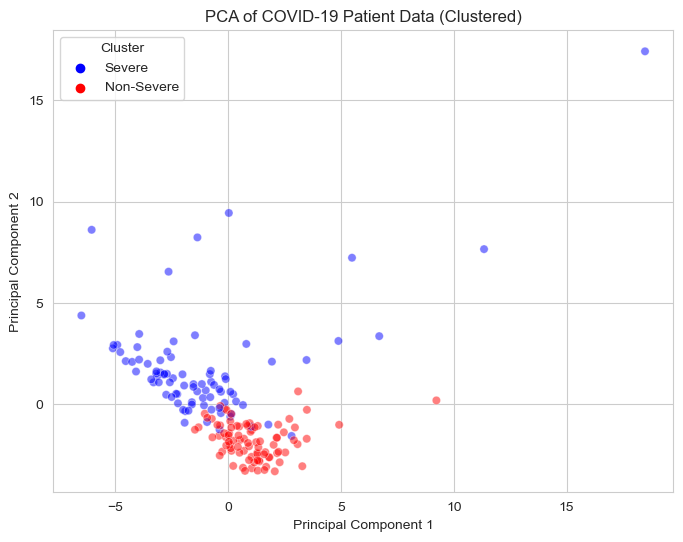

In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_scaled is the scaled features used for clustering
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = discharged_patients_mod['New_Outcome'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe'})

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=principalDf, palette=['blue', 'red', ], alpha=0.5)
plt.title('PCA of COVID-19 Patient Data (Clustered)')
plt.legend(title='Cluster')
plt.show()


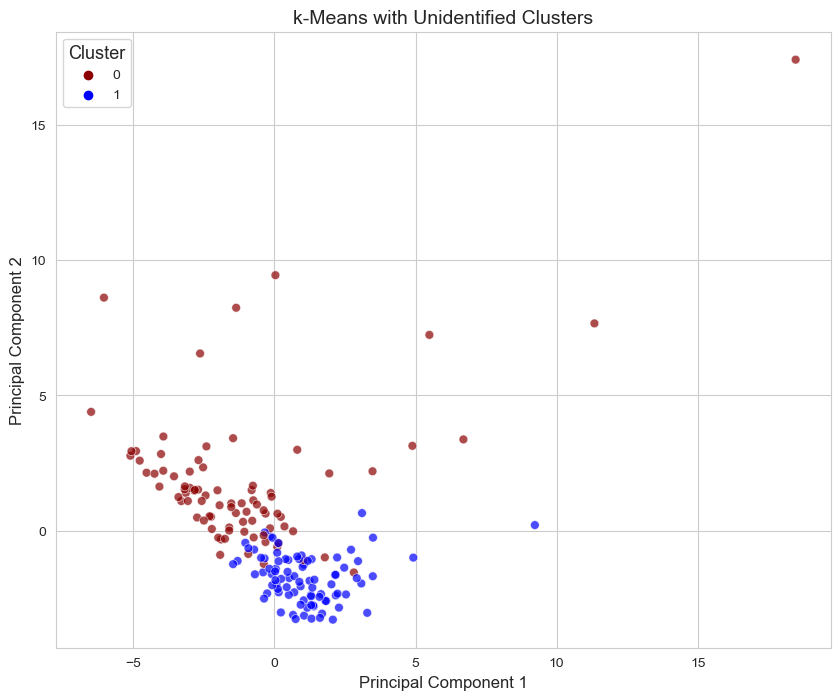

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_scaled are the scaled features used for clustering
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels from your modified data
principalDf['Cluster'] = discharged_patients_mod['New_Outcome'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0', 1: '1'})

# Define your custom palette with improved colors
custom_palette = {'0': '#8B0000', '1': '#0000FF'}  # Dark red for Severe, Blue for Non-Severe

# Plotting with aesthetic improvements
plt.figure(figsize=(10, 8)) 
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                data=principalDf, palette=custom_palette, alpha=0.7, s=40)
plt.title('k-Means with Unidentified Clusters', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize='13')
plt.show()


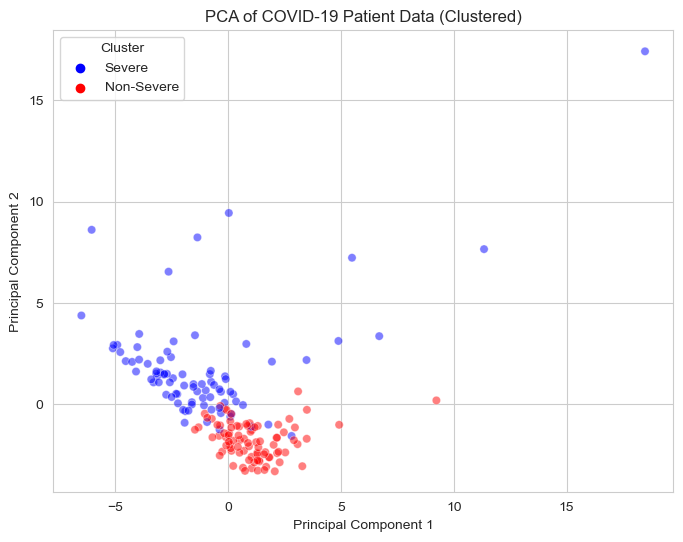

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_scaled is the scaled features used for clustering
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = discharged_patients_mod['New_Outcome'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe'})

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=principalDf, palette=['blue', 'red', ], alpha=0.5)
plt.title('PCA of COVID-19 Patient Data (Clustered)')
plt.legend(title='Cluster')
plt.show()


In [56]:
# Counting each category
cluster_counts = dataset['Outcome_numerical'].value_counts()
cluster_counts

1    86
0    85
2    26
Name: Outcome_numerical, dtype: int64

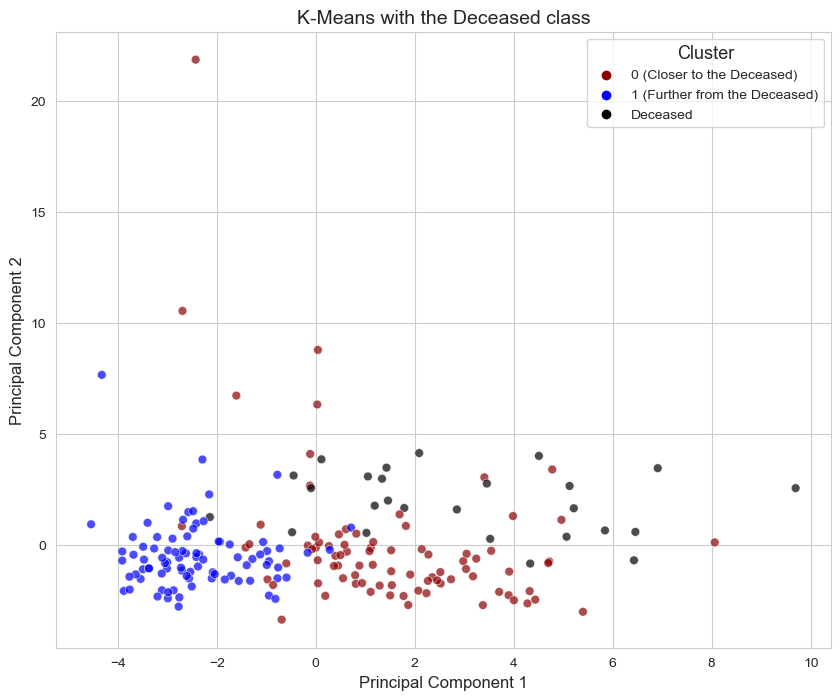

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: '0 (Closer to the Deceased)', 1: '1 (Further from the Deceased)', 2: 'Deceased'})

# Define your custom palette with improved colors for three classes
custom_palette = {'1 (Further from the Deceased)': '#0000FF', 'Deceased': 'black', '0 (Closer to the Deceased)': '#8B0000'}  # Blue for Severe, Black for Non-Severe, Dark Red for Death

# Plotting with aesthetic improvements
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                data=principalDf, palette=custom_palette, alpha=0.7, s=40)
plt.title('K-Means with the Deceased class', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize='13')
plt.show()


In [58]:
# Apply mapping
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe', 2: 'Deceased'})

# Check the resulting DataFrame
print("Mapped cluster labels:", principalDf['Cluster'].unique())
print("DataFrame after mapping:\n", principalDf.head())


Mapped cluster labels: [nan]
DataFrame after mapping:
    Principal Component 1  Principal Component 2 Cluster
0               2.354708              -1.474005     NaN
1               0.450366              -0.946601     NaN
2              -2.987693              -2.422160     NaN
3               2.073853              -2.078637     NaN
4               3.243212              -0.636139     NaN


In [59]:
# Apply Seaborn styles for nicer plots
sns.set_style("whitegrid")

# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe', 2: 'Deceased'})


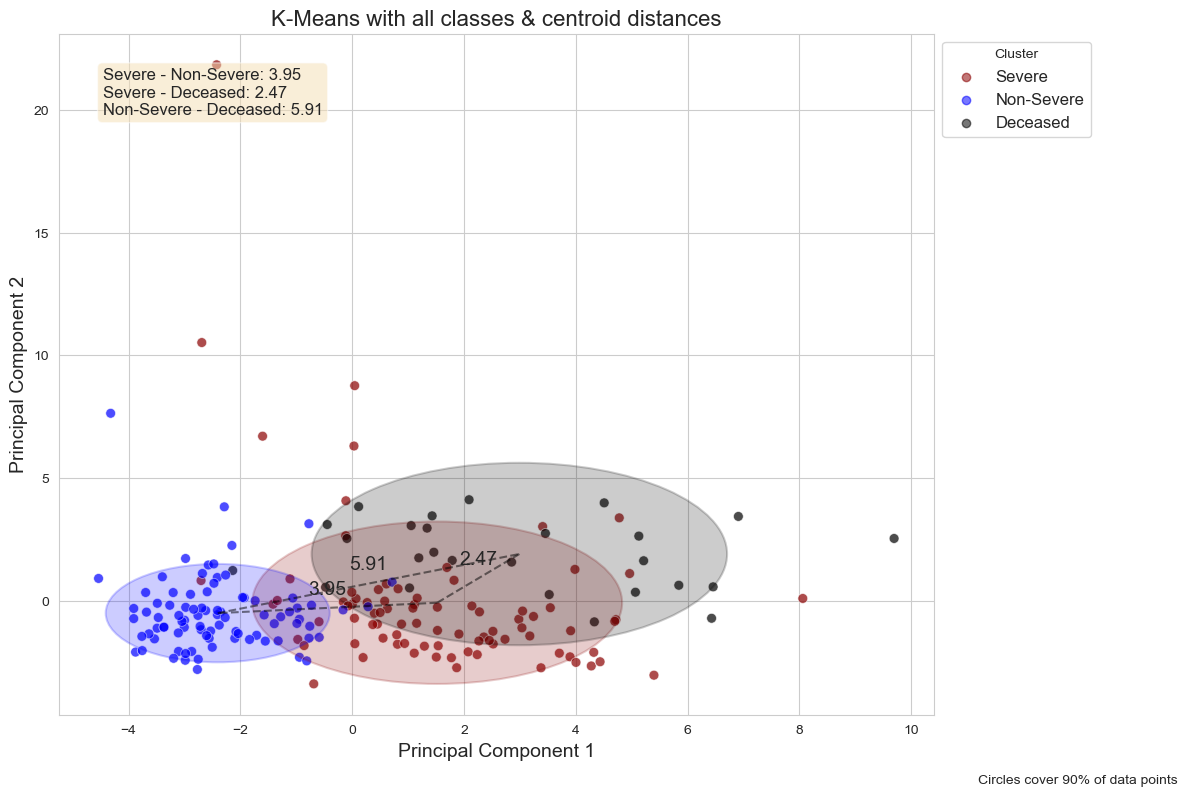

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Circle
from itertools import combinations
import math

# Define faded colors for each cluster label
fade_colors = {
    'Severe': '#8B000088',      # Dark Red
    'Non-Severe': '#0000FF88',  # Blue
    'Deceased': '#00000088'     # Black
}

# Initialize the plot with adjusted size
plt.figure(figsize=(12, 8))

# Draw the scatter plot first to control axes limits later
ax = sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster',
                     data=principalDf, palette=fade_colors, alpha=0.7, s=50)

# Initialize centroids dictionary
centroids = {}

# Calculate and draw circles with the fade color for each cluster
for cluster in principalDf['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = principalDf[principalDf['Cluster'] == cluster]
    centroid = cluster_data[['Principal Component 1', 'Principal Component 2']].mean()
    centroids[cluster] = centroid 
    distances = np.linalg.norm(cluster_data[['Principal Component 1', 'Principal Component 2']].values - centroid.values, axis=1)
    radius = np.percentile(distances, 80) 

    # Draw a circle around the cluster
    circle = Circle((centroid[0], centroid[1]), radius, color=fade_colors[cluster], fill=True, alpha=0.2, linewidth=1.5)
    ax.add_patch(circle)

# Function to draw lines with annotations for distances
def draw_line_with_annotation(ax, point1, point2, distance):
    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--', alpha=0.5)
    mid_point = [(point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2]
    # Increase fontsize in the annotation
    ax.annotate(f'{distance:.2f}', xy=(mid_point[0], mid_point[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)  # Increased fontsize
distance_texts = []
for (cluster1, centroid1), (cluster2, centroid2) in combinations(centroids.items(), 2):
    distance = np.linalg.norm(centroid1 - centroid2)
    distance_texts.append(f"{cluster1} - {cluster2}: {distance:.2f}")

# Combine distance texts into one string
distance_summary = "\n".join(distance_texts)

# Place a text box in upper left in axes coords
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, distance_summary, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Calculate and annotate distances between each pair of centroids
for (cluster1, centroid1), (cluster2, centroid2) in combinations(centroids.items(), 2):
    distance = np.linalg.norm(centroid1 - centroid2)
    draw_line_with_annotation(ax, centroid1, centroid2, distance)

# Enhancing the plot
plt.title('K-Means with all classes & centroid distances', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

# Adjust legend inside the plot for clarity and add the note about 90% coverage
legend = plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.text(1.05, -0.1, 'Circles cover 90% of data points', transform=ax.transAxes, fontsize=10)

# Display the plot with adjusted layout
plt.tight_layout()
plt.show()


In [ ]:
# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe', 2: 'Death'})

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=principalDf, palette=[ 'red', 'blue','black'], alpha=0.5)
plt.title('PCA of COVID-19 Patient Data (Clustered)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Standardize the features
U = dataset[features_to_cluster].fillna(1)
scaler = StandardScaler()
U_scaled = scaler.fit_transform(U)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(U_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Combine with cluster labels
principalDf['Cluster'] = dataset['Outcome_numerical'].values 
# Map the numerical clusters back to descriptive names
principalDf['Cluster'] = principalDf['Cluster'].map({0: 'Severe', 1: 'Non-Severe', 2: 'Death'})

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=principalDf, palette=[ 'red', 'pink','black'], alpha=0.5)
plt.title('PCA of COVID-19 Patient Data (Clustered)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# 'U' is the original dataset with all features before scaling
severe_cases = U[dataset['Outcome_numerical'] == 0]  # Severe cases
death_cases = U[dataset['Outcome_numerical'] == 2]   # Death cases

# Calculate mean values for each feature within each group
mean_severe = severe_cases.mean()
mean_death = death_cases.mean()

# Compare the means and compute the difference in means between the two groups
mean_diff = (mean_severe - mean_death).abs()

# Sort the features by the smallest difference in means (indicating similarity)
similar_features = mean_diff.sort_values(ascending=True)

# Display the features with the most similarity 
print("Features most similar between severe and death cases (Top 50):")
similar_features.head(50)


In [ ]:

# Exporting progress 
file_path_dataset1 = '/Clustering_delta_new.xlsx' 
dataset.to_excel(file_path_dataset1, index=False)